<a href="https://colab.research.google.com/github/hajdekd/Data-Science-Projects/blob/main/Dalibor_Hajdek_Unsupervised_ML_Clustering_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background:

*  In this lab, the dataset is from several engineering colleges. The goal is to create clusters based on the
information provided in the dataset. Then, a survey will be created to rank these colleges. The survey
will be an evidence-based document and provides insights to future students. 

# Objectives:

*  To identify different types of engineering colleges (clusters) to better understand their ranks and information. 

# Data Description:

The data contains a survey of 26 engineering colleges. This survey has summarized the data into a rating scale of 1-5 for
different factors. The rating scale is as follows:
* 1 - Very low
* 2 - Low
* 3 - Medium
* 4 - High
* 5 - Very high

**Columns:**

* SR_NO: Serial Number
* Engg_College: 26 Engineering colleges with A to Z as their names
* Teaching: The rating for the quality of teaching at each engineering college (1-5)
* Fees: The rating of the fees at each engineering college (1-5)
* Placements: The rating of the job placement after the student graduates from each engineering college (1-5)
* Internship: The rating of the student Internships at each engineering college (1-5)
* Infrastructure: The rating of the infrastructure of each engineering college (1-5)

# Importing Libraries

In [ ]:
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.7 MB/s 
     |████████████████████████████████| 843 kB 49.1 MB/s 
     |████████████████████████████████| 96 kB 5.7 MB/s 
     |████████████████████████████████| 1.6 MB 40.9 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=40030b52fec90f93886e0687c238c49a2cca824a486e1c917009aa4528a6ff05
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Loading Data

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

In [ ]:
# Loading the data

df = pd.read_excel('/content/drive/MyDrive/colleges_dataset.xlsx')

<IPython.core.display.Javascript object>

In [ ]:
# Creating a copy of the data
data = df.copy()

<IPython.core.display.Javascript object>

# Exploring the Data (EDA)

In [ ]:
# Viewing first 5 rows of the dataset
data.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


<IPython.core.display.Javascript object>

In [ ]:
# Viewing last 5 rows of the dataset
data.tail()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
21,22,V,2,2,1,2,1
22,23,W,2,5,1,1,1
23,24,X,1,1,1,2,5
24,25,Y,1,1,1,1,5
25,26,Z,3,4,5,2,3


<IPython.core.display.Javascript object>

In [ ]:
#Getting the shape of the dataset
data.shape

(26, 7)

<IPython.core.display.Javascript object>

Observation:

* The dataset has 26 rows and 7 columns

In [ ]:
#Printing the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


<IPython.core.display.Javascript object>

Observation:

* 6 variables are of int type.
* Engg_College is object type.

In [ ]:
#Checking the dataset for missing values
data.isnull().sum()

SR_NO             0
Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64

<IPython.core.display.Javascript object>

Observation:

The dataset does not have any missing values.

In [ ]:
#Checking for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

Observation:

The dataset does not have any duplicate values.

In [ ]:
# Summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SR_NO,26.0,13.500000,7.648529,1.0,7.25,13.5,19.75,26.0
Teaching,26.0,2.807692,1.132051,1.0,2.00,3.0,3.00,5.0
Fees,26.0,3.576923,1.331858,1.0,2.25,4.0,5.00,5.0
Placements,26.0,2.884615,1.531716,1.0,1.25,3.0,4.00,5.0
Internship,26.0,2.769231,1.242826,1.0,2.00,2.0,4.00,5.0
Infrastructure,26.0,3.384615,1.298520,1.0,3.00,3.0,4.75,5.0


<IPython.core.display.Javascript object>

In [ ]:
#Dropping SR_NO variable
data.drop("SR_NO", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
cols = data.select_dtypes(["object"])
cols.columns

Index(['Engg_College'], dtype='object')

<IPython.core.display.Javascript object>

In [ ]:
#Converting object type variable into categorical
for i in cols.columns:
    data[i] = data[i].astype("category")

<IPython.core.display.Javascript object>

In [ ]:
data.describe(include=["category"]).T

,count,unique,top,freq
Engg_College,26,26,A,1


<IPython.core.display.Javascript object>

In [ ]:
# Checking unique names 
data.Engg_College.unique()

['A', 'B', 'C', 'D', 'E', ..., 'V', 'W', 'X', 'Y', 'Z']
Length: 26
Categories (26, object): ['A', 'B', 'C', 'D', ..., 'W', 'X', 'Y', 'Z']

<IPython.core.display.Javascript object>

In [ ]:
#Printing the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Engg_College    26 non-null     category
 1   Teaching        26 non-null     int64   
 2   Fees            26 non-null     int64   
 3   Placements      26 non-null     int64   
 4   Internship      26 non-null     int64   
 5   Infrastructure  26 non-null     int64   
dtypes: category(1), int64(5)
memory usage: 2.4 KB


<IPython.core.display.Javascript object>

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

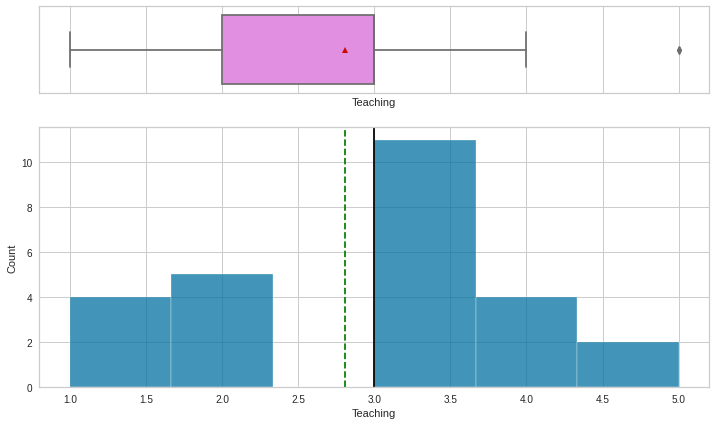

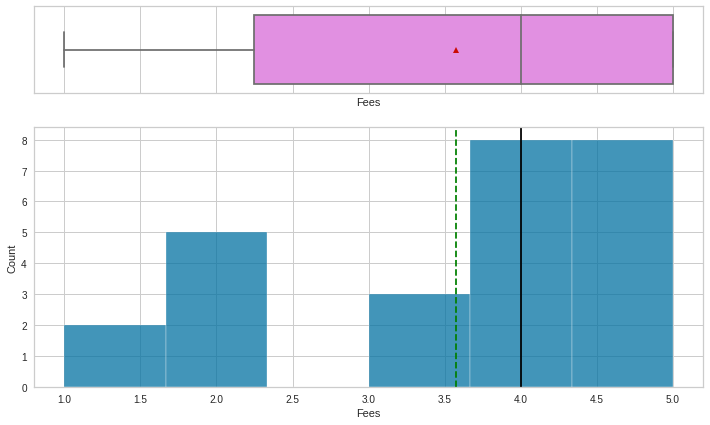

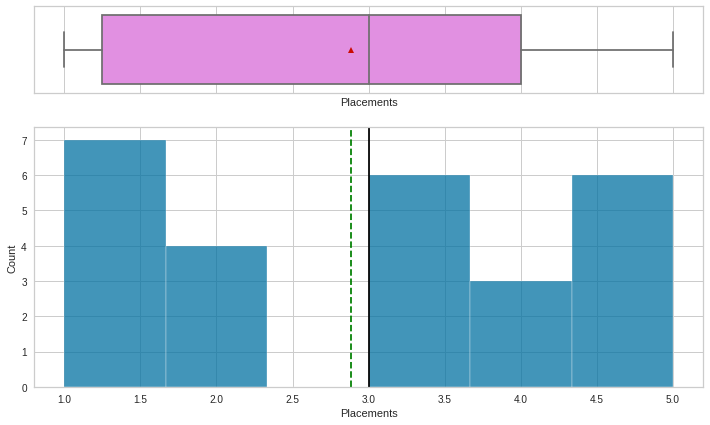

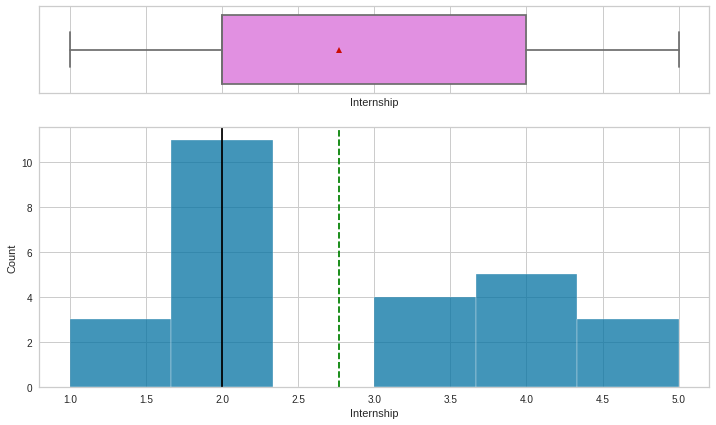

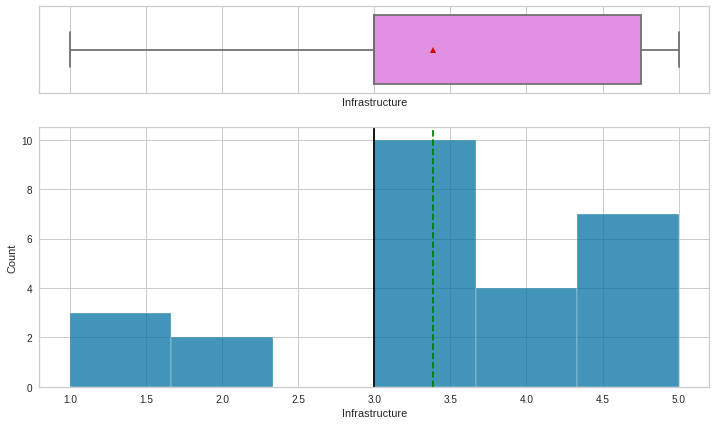

<IPython.core.display.Javascript object>

In [ ]:
# Selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item)

Observation:

* For Teaching and Infrastructure, most values are distributed at 3.
* Fees have most values at 4 and 5.
* Placement has most values at 1.
* Internship has majority of values at 2.

## Examining CDF (cumulative distribution function) Plots

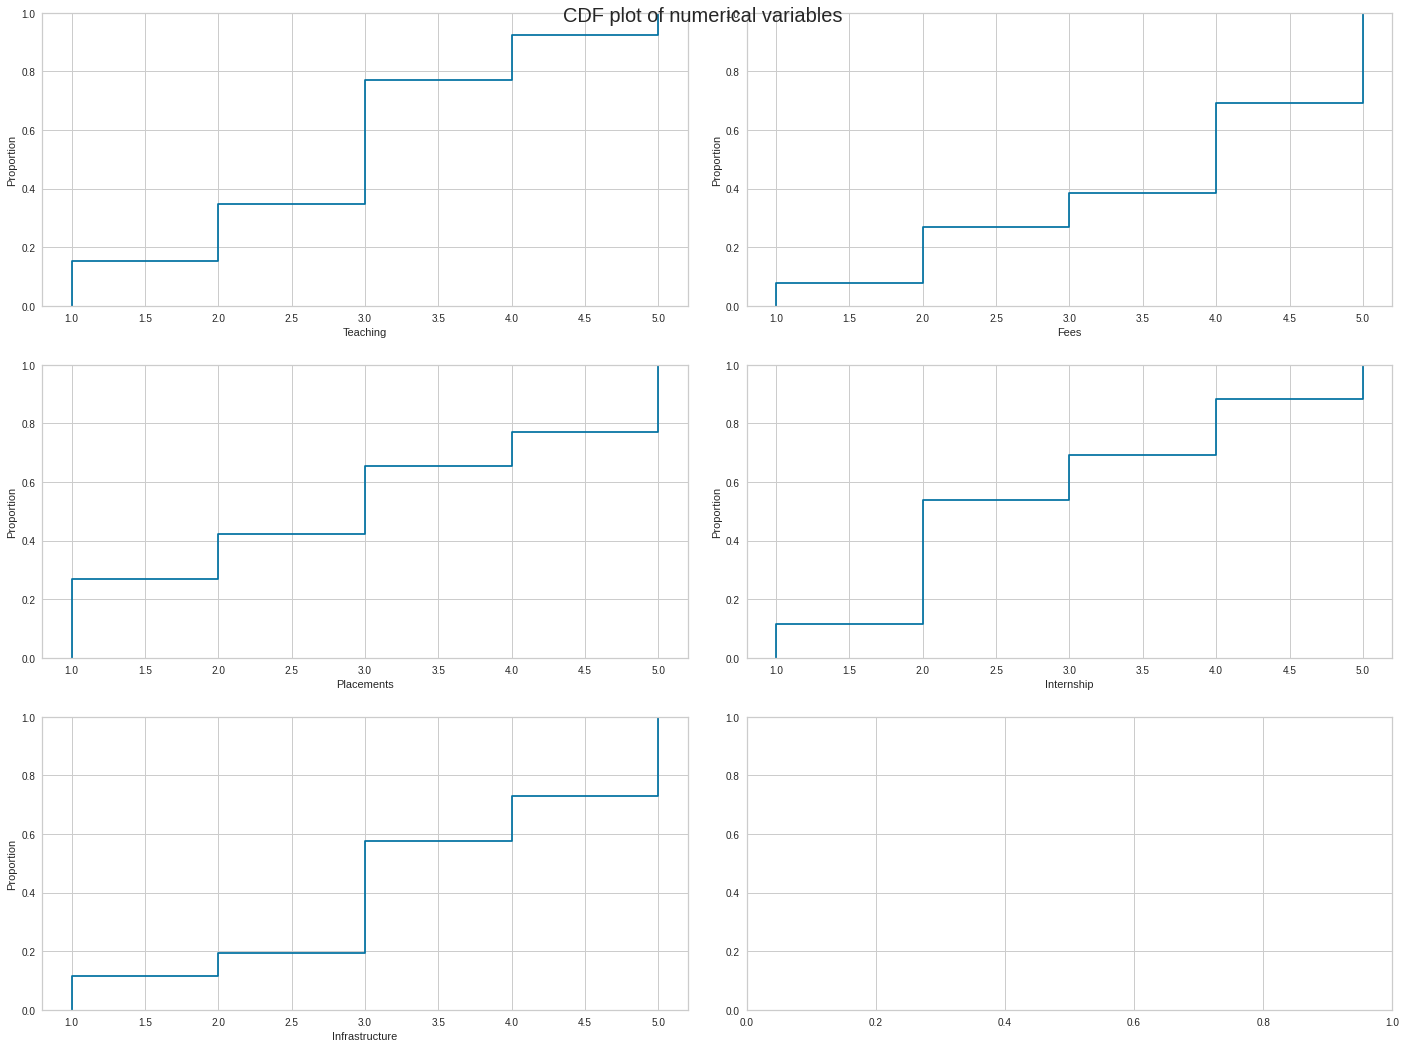

<IPython.core.display.Javascript object>

In [ ]:
# Proportion is between 0-1 (percentage)
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=data[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=data[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

Observation:

* More than 90% of Engineering colleges have Teaching ratings below 5.
* 70% of Engineering colleges have Fees ratings below 5.
* Slightly under 80% of Engineering colleges have Placements ratings below 5.
* 90% of Engineering colleges have Internship ratings below 5.
* Around 75% of Engineering colleges have Infrastructure ratings below 5.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


<IPython.core.display.Javascript object>

Teaching:

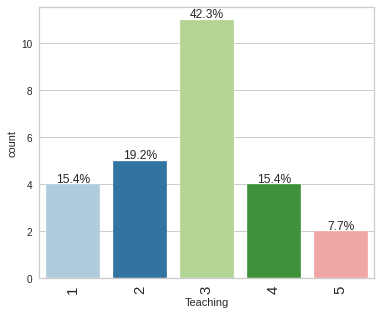

<IPython.core.display.Javascript object>

In [ ]:

labeled_barplot(data, "Teaching", perc=True)

Observation:

* 42.3% of of Engineering colleges have Teaching ratings of 3.

Fees:

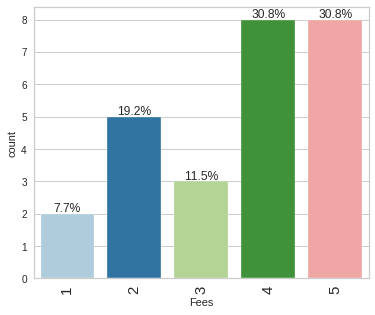

<IPython.core.display.Javascript object>

In [ ]:

labeled_barplot(data, "Fees", perc=True)

Over 61% of of Engineering colleges have Fees ratings of 4 and 5.

Placements:

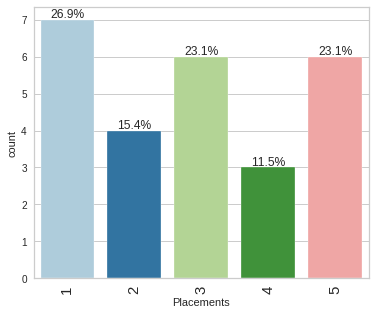

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Placements", perc=True)

Observation:

* 26.9% of of Engineering colleges have Placements ratings of 1 followed by those of ratings of 1 and 3 with 23.1% each.

Internship:

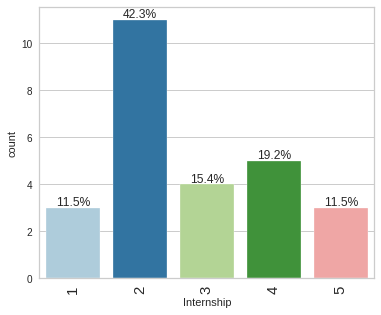

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Internship", perc=True)

Observation:

* 42.3% of of Engineering colleges have Internship ratings of 2.

Infrastructure:

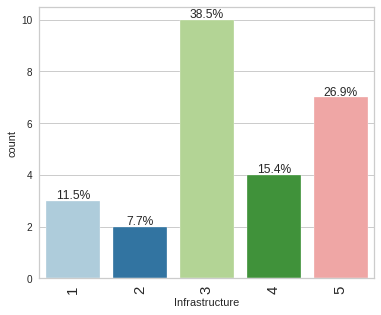

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Infrastructure", perc=True)

Observation:

* 38.5% of of Engineering colleges have Infrastructure ratings of 3.

## Bivariate Analysis

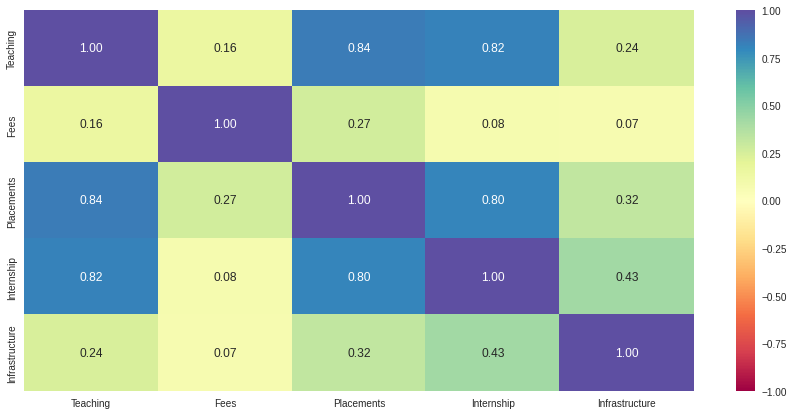

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation:

* Teaching ratings have high correlation with Placements and Internship ratings. 
* Fees ratings has the weakest relationship with other variables.

# Data Preprocessing

In [ ]:
# Choosing variables that will be used in clustering
# num_col stores numerical columns
num_col

['Teaching', 'Fees', 'Placements', 'Internship', 'Infrastructure']

<IPython.core.display.Javascript object>

In [ ]:
# Scaling
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [ ]:
# Creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

# Model Building

###  Elbow Method for finding the best value for K

In [ ]:
clusters = range(1, 9)
# creating 8 clusters
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )  # cdist calculate the minimum distance using euclidena measure between data points and centroid in
        # every cluster and with the centroid of the neighboring cluster
        / subset_scaled_df.shape[0]
    )

    # distorion in k-means is defined as the sum of the squared distances between
    # each data point and the centroid within a cluster. The k-means method tries to minimize the distorion.
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.087990295998642
Number of Clusters: 2 	Average Distortion: 1.6030760049686552
Number of Clusters: 3 	Average Distortion: 1.3542868697697457
Number of Clusters: 4 	Average Distortion: 1.1658645562214658
Number of Clusters: 5 	Average Distortion: 1.0463920035203713
Number of Clusters: 6 	Average Distortion: 0.9095886756490557
Number of Clusters: 7 	Average Distortion: 0.8046619356513329
Number of Clusters: 8 	Average Distortion: 0.7161563518185236


<IPython.core.display.Javascript object>

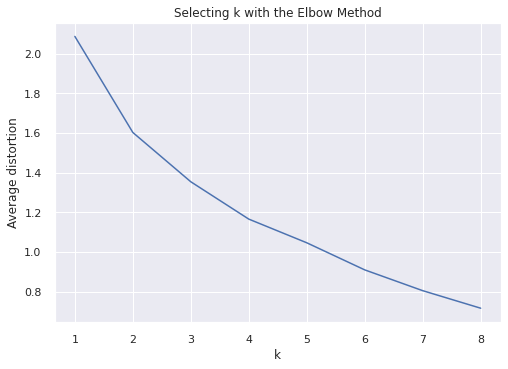

<IPython.core.display.Javascript object>

In [ ]:
# plotting the elbow method: a way of choosing a value for k = number of clusters
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

Observation:

* Proper value for k appears to be 3 or 4.

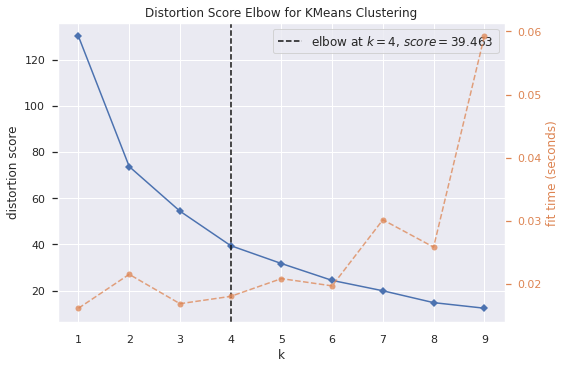

<IPython.core.display.Javascript object>

In [ ]:
# let's check out the KElbow Visualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

* Appropriate value for k appears to be 4 based on the KElbow KMean Clustering plot.  

### Checking the silhouette scores to find the best value for K 

For n_clusters = 2, the silhouette score is 0.3347415593639785)
For n_clusters = 3, the silhouette score is 0.2896589939792401)
For n_clusters = 4, the silhouette score is 0.3490226771698325)
For n_clusters = 5, the silhouette score is 0.3578484211066675)
For n_clusters = 6, the silhouette score is 0.3434990793023485)
For n_clusters = 7, the silhouette score is 0.3661442615367182)
For n_clusters = 8, the silhouette score is 0.4047546863059053)
For n_clusters = 9, the silhouette score is 0.39102713851068926)


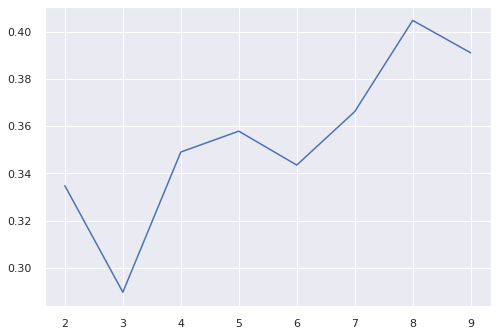

<IPython.core.display.Javascript object>

In [ ]:
# let's check the silhouette visualizer out
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

Observation:

* Silhouette score for 4 is much higher than for 3.

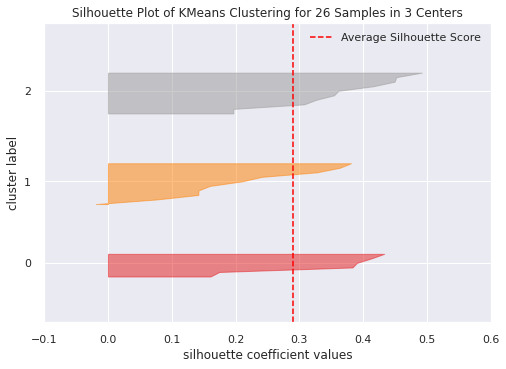

<IPython.core.display.Javascript object>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=1)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

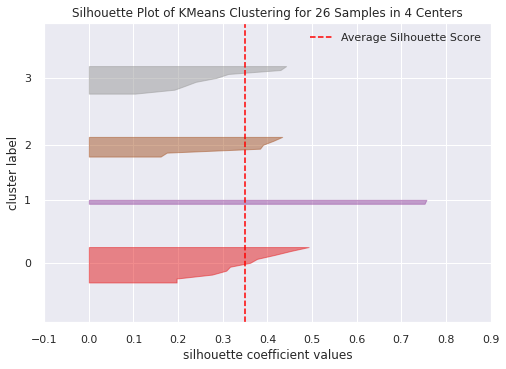

<IPython.core.display.Javascript object>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

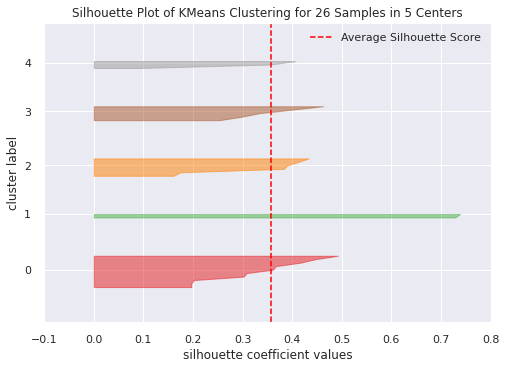

<IPython.core.display.Javascript object>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

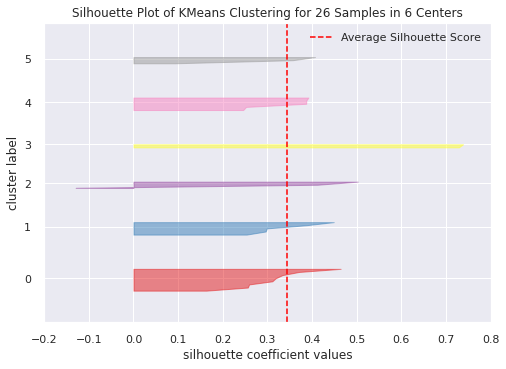

<IPython.core.display.Javascript object>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

## Running the model using the best value of K

In [ ]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

<IPython.core.display.Javascript object>

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes

data["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [ ]:
# adding kmeans cluster labels to the original dataframe
cluster_profile = data.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Teaching,Fees,Placements,Internship,Infrastructure
K_means_segments,,,,,
0,2.125000,3.125000,1.375000,1.750000,2.000000
1,4.000000,3.625000,4.375000,4.375000,4.250000
2,2.750000,4.625000,3.375000,2.500000,3.500000
3,1.000000,1.000000,1.000000,1.500000,5.000000


<IPython.core.display.Javascript object>

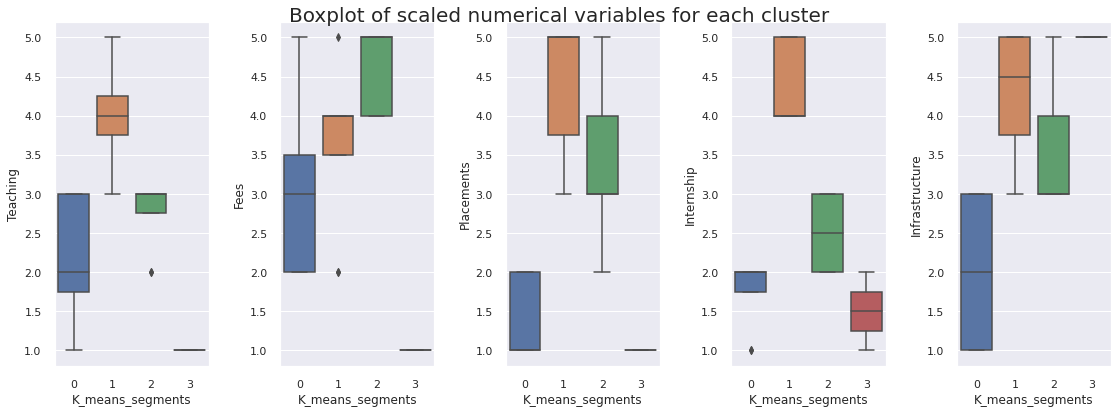

<IPython.core.display.Javascript object>

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=data[num_col[counter]],
        x=data["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

# Insights for each cluster

* **Cluster 0:**

  * Teaching ratings in this cluster have median between 2 and 3.
  * Fees ratings have median between 3 and 3.5.
  * Placemnets ratings is low, ranging between 1 and 2.
  * Internship ratings are at 2
  * Median for Infrastructure ratings is between 2 and 3.



  * **Cluster 1:**

    * Teaching ratings in this cluster are the highest with average of 4.5.
    * Fees ratings have median between 3.5 and 4.
    * Placemnets ratings average are at 4.3.
    * Internship ratings are between 4 and 5.
    * Median for Infrastructure ratings is between 4.5 and 5.

  * **Cluster 2:**

    * Teaching ratings in this cluster are between 2.75 and 3.
    * Fees ratings are between 4 and 5.
    * Placemnets ratings are between 3 and 4.
    * Median for Internship ratings are between 2.5 and 3.
    * Median for Infrastructure ratings is between 3 and 4.

  * **Cluster 2:**

    * Median for Teaching ratings in this cluster is almost 0.
    * Median for Fees ratings is also close to 0.
    * Placemnets ratings median falls close to 0.
    * Median for Internship ratings are between 1.5 and 2.
    * Median for Infrastructure ratings is almost 5.




**Comparing Cluster vs Engineering Colleges**

In [ ]:
pd.crosstab(data.K_means_segments, data.Engg_College).style.highlight_max(
    color="lightgreen", axis=0
)

Engg_College,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
K_means_segments,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,0,0,0
1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


<IPython.core.display.Javascript object>

Observations:

* Colleges X and Y have lowest Teaching, Fees, and Placements ratings.
* X and Y colleges hae the highest infrastructure ratings.


# Conclusion

* Cluster 0 consists of colleges with somewhat lower ratings.
* Colleges in Cluster 1 have the highest ratings on average.
* Cluster 2 consists of colleges with high ratings in some categories and low in others.
* Colleges in cluster 3 have 0 ratings for 3 categories. 